# 2019 Paper
Problem 1

[[-0.00950585]
 [-0.03778289]
 [ 0.01281648]
 [-0.00950585]
 [-0.00270846]
 [ 0.00831648]]
[[ 10391.85841368]
 [  2303.78882929]
 [  9000.        ]
 [-10391.85841368]
 [ -2303.78882929]
 [ -2088.63351212]]


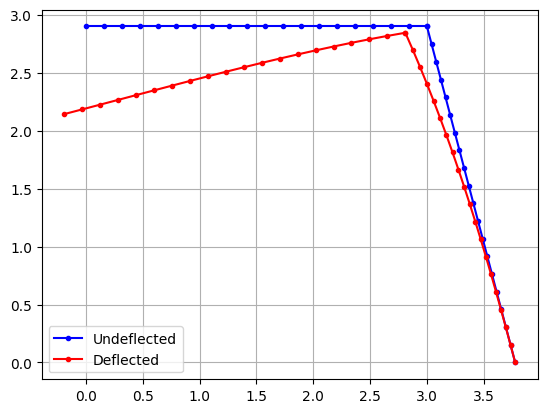

In [3]:
from FEA.FEA import *


I = 1e-5
A = 1e-3
E = 200e9
L = 3
angle_1 = 0
angle_2 = -75

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


element1 = Element(A_1, E, I, L, A, angle_1, UDL=-2000)
element2 = Element(A_2, E, I, L, A, angle_2)

Q = np.array([
    [0],
    [0],
    [0],
    [4914.9],
    [-3441.5],
    [0]
])

structure = Structure([element1, element2], Q)

structure.solve()

print(structure.q)
print(structure.elements[1].local_force)

nodes = np.array([
    [[0, 2.8978], [3, 2.8978]],
    [[3, 2.8978], [3.776, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2019 Paper
Problem 2

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]
[[     0.]
 [-12000.]
 [ -4000.]
 [     0.]
 [-12000.]
 [  4000.]]
[[-78480.        ]
 [ 24000.        ]
 [ 76340.01205396]]
[[ 6.56702210e-05]
 [ 2.10512340e-02]
 [-1.20523386e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]
[-3.28351105e-05]


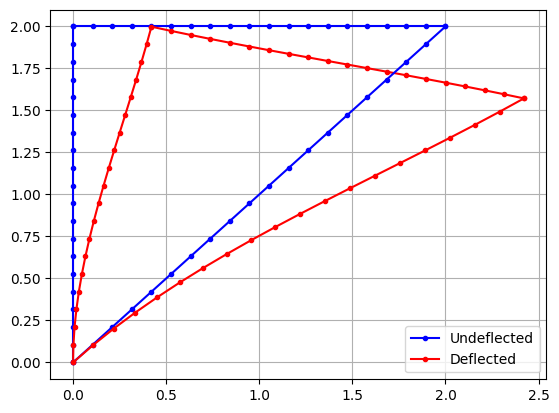

[0.00751253]


In [3]:
from FEA.FEA import *


I = 9e-6
A = 8e-4
E = 200e9
L_1 = L_2 = 2
L_3 = 2.83
angle_1 = -90
angle_2 = 0
angle_3 = -135

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


elements = [
    Element(A_1, E, I, L_1, A, angle_1, LVL=78480),
    Element(A_2, E, I, L_2, A, angle_2, UDL=-12000),
    Element(A_3, E, I, L_3, A, angle_3)
]

Q = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

reaction_forces = structure.elements[0].global_force[3:6] + structure.elements[2].global_force[3:6] - structure.elements[0].LVL_F_eq[3:6]
print(reaction_forces)

print(structure.elements[0].element_deflections)
print(structure.elements[0].strain)

nodes = np.array([
    [[0, 2], [0, 0]],
    [[0, 2], [2, 2]],
    [[2, 2], [0, 0]]
])

structure.plot_structure(nodes, 20, 20)

deflection_mid_span = structure.elements[0].calculate_deflections(structure.elements[0].L/2)
print(deflection_mid_span[0])

# 2020 Paper
Problem 1

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.00010823]
 [-0.00894012]
 [-0.02826614]]
[[2.70342786e-03]
 [5.41150721e-05]]


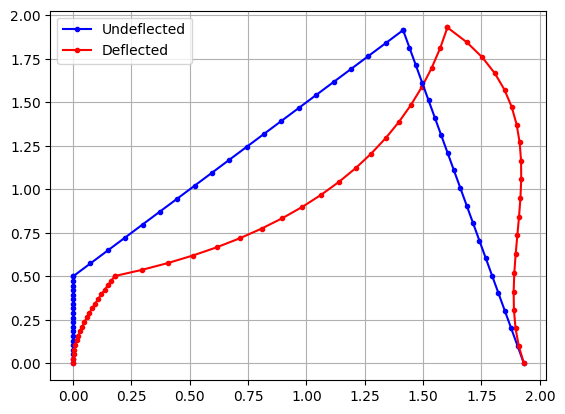

In [2]:
from FEA.FEA import *

I = 1e-6
A = 4e-4
E = 10e9
L_1 = 0.5
L_2 = 2
L_3 = 2
angle_1 = 90
angle_2 = 45
angle_3 = -75

A_1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


elements = [
    Element(A_1, E, I, L_1, A, angle_1),
    Element(A_2, E, I, L_2, A, angle_2, point_load=(1.5, 10, 4e3, 1, -1)),
    Element(A_3, E, I, L_3, A, angle_3)
]

Q = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[1].PL_f_axial)
# print(structure.elements[1].PL_f_shear)

# print(structure.external_force_vector)

# print(structure.q)

# reaction forces
# print(structure.elements[0].global_force)
# print(structure.elements[2].global_force)

# print(structure.elements[0].local_force)
# print(structure.elements[0].strain)

# print(structure.elements[2].local_force)
# print(structure.elements[2].strain)

print(structure.elements[0].element_deflections)

displacement = structure.elements[0].calculate_deflections(structure.elements[0].L/2)
print(displacement)


nodes = np.array([
    [[0, 0], [0, 0.5]],
    [[0, 0.5], [1.4142, 1.4142+0.5]],
    [[1.4142, 1.4142+0.5], [1.4142+0.5176, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2020 Paper
Problem 2

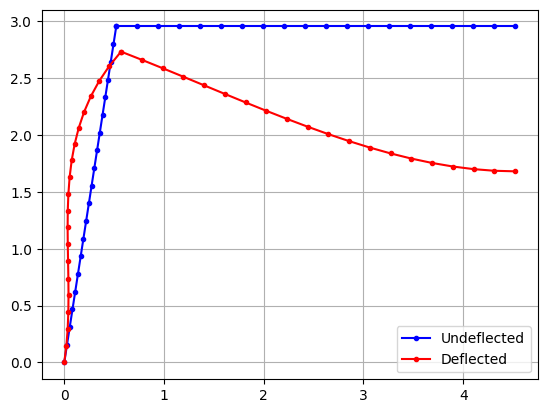

In [1]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
])

E = 30e9
I1 = 6e-6
I2 = 11.6e-6
A = 2e-4

L1 = 3
L2 = 2

angle1 = 80
angle2 = 0

elements = [
    Element(A1, E, I1, L1, A, angle1),
    Element(A2, E, I2, L2, A, angle2, UDL=-10e3)
]

Q = np.zeros((4,1)) 

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)

# print(structure.elements[1].UDL_f_eq)
# print(structure.external_force_vector)

# print(structure.q)

# reaction forces
# print(structure.elements[0].local_force)
# print(structure.elements[1].local_force - structure.elements[1].UDL_f_eq)

# print(structure.elements[0].global_force[2])

nodes = np.array([
    [[0, 0], [0.521, 2.954]],
    [[0.521, 2.954], [4 + 0.521, 2.954]]
])

structure.plot_structure(nodes, 20, 20)

# 2021 Paper
Problem 1

[[-25000.]
 [ 65000.]
 [ 35000.]
 [ 25000.]
 [ 55000.]
 [-20000.]]
[[     0.]
 [ 65000.]
 [ 45000.]
 [     0.]
 [ 55000.]
 [-40000.]]


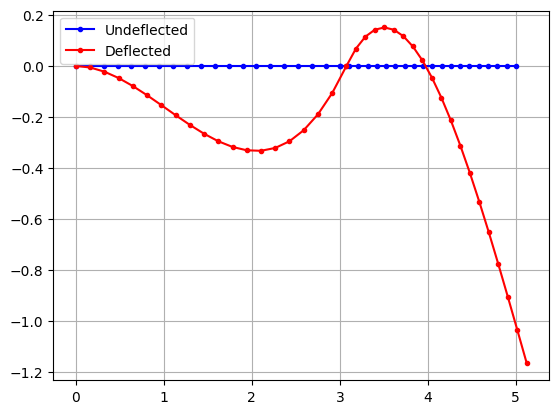

In [49]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

E = 200e9
I = 1e-6
A = 1e-4
L1 = 3
L2 = 2
angle1 = 0
angle2 = 0

elements = [
    Element(A1, E, I, L1, A, angle1, UDL=-40e3),
    Element(A2, E, I, L2, A, angle2)
]

Q = np.array([
    [0],
    [0],
    [25e3],
    [-10e3],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)

# print(structure.external_force_vector)
# print(structure.q)

print(structure.elements[0].local_force - structure.elements[0].UDL_f_eq)
print(structure.elements[1].local_force - structure.elements[0].UDL_f_eq - structure.elements[0].local_force)

nodes = np.array([
    [[0, 0], [3, 0]],
    [[3, 0], [5, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2021 Paper
Problem 2

[[-15023.09529387]
 [-19428.83661943]
 [ -3416.2972752 ]
 [ 15023.09529387]
 [-72539.91338057]
 [ 31484.83072664]]
[[ 15023.09529387]
 [ 19428.83661943]
 [  4319.12326152]
 [-15023.09529387]
 [-19428.83661943]
 [ 15109.71335791]]


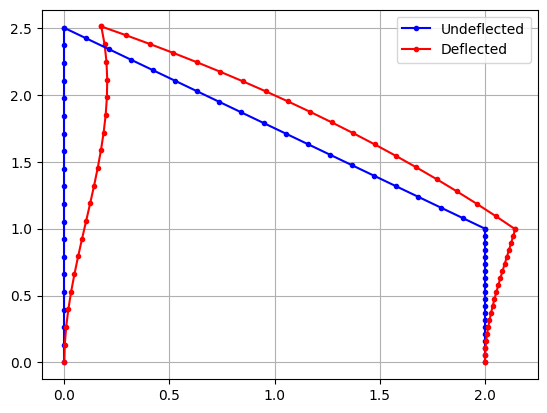

In [79]:
from FEA.FEA import *

A1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

A3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
])

E = 200e9
I = 7.5e-6
A = 9e-4
L1 = 2.5
L2 = 2.5
L3 = 1
angle1 = -90
angle2 = -36.87
angle3 = -90

elements = [
    Element(A1, E, I, L1, A, angle1, LVL=1000 * 9.81 * 2.5 * 3),
    Element(A2, E, I, L2, A, angle2),
    Element(A3, E, I, L3, A, angle3)
]

Q = np.zeros((6, 1))

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].LVL_f_eq)
# print(structure.external_force_vector)
# print(structure.q)

print(structure.elements[0].local_force - structure.elements[0].LVL_f_eq)
print(structure.elements[2].local_force)

# displacement = structure.elements[1].calculate_deflections(structure.elements[1].L/2)
# print(displacement)

nodes = np.array([
    [[0, 2.5], [0, 0]],
    [[0, 2.5], [2, 1]],
    [[2, 1], [2, 0]]
])

structure.plot_structure(nodes, 50, 20)